#### Imports

In [4]:
from package.package import *

def scale_data(train, test=''):    # Also adding scaling function.
    scaler = StandardScaler()

    train_data = scaler.fit_transform(train)
    
    if type(test) != str:
        test_data = scaler.transform(test)
        return train_data, test_data
    else:
        return train_data

display(dataset)


,Unnamed: 0,Team,League,Year,OBP,SLG,BA,Playoffs,ERA,ERA+,FIP,HR,RBIs,Ks,RC
0,1231,WSA,AL,1962,0.308,0.373,0.250,0,4.04,101,4.18,132,566,771,631.954286
1,1230,STL,NL,1962,0.335,0.394,0.271,0,3.55,121,3.81,137,707,914,737.178629
2,1229,SFG,NL,1962,0.341,0.441,0.278,1,3.79,101,3.81,204,807,886,836.315660
3,1228,PIT,NL,1962,0.321,0.394,0.268,0,3.37,117,3.46,108,655,897,694.471682
4,1227,PHI,NL,1962,0.330,0.390,0.260,0,4.28,91,4.13,142,658,863,689.183835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1467,WSN,NaN,2021,0.337,0.417,0.258,1,4.80,84,4.87,182,686,1346,744.079320
1468,1468,PIT,NaN,2021,0.309,0.364,0.236,1,5.08,84,4.74,124,570,1312,744.079320
1469,1469,TEX,NaN,2021,0.294,0.375,0.232,1,4.79,92,4.76,167,598,1239,744.079320
1470,1470,BAL,NaN,2021,0.304,0.402,0.239,1,5.84,77,5.15,195,632,1234,744.079320


#### Prepare data for simulation

In [5]:
target = (dataset['Playoffs'])
data_all = (dataset[['OBP', 'SLG', 'BA', 'ERA', 'ERA+', 'FIP', 'Ks', 'HR', 'RBIs', 'RC']])

display(target)
display(data_all)

# ---- VARIABLE DESCRIPTIONS ----
# OBP:          on-base percentage
# SLG:          slugging percentage
# BA:           batting average
# Playoffs:     binary (if team made playoffs or not)
# ERA:          earned run average
# ERA+:         earned run average +
# FIP:          fielding independent pitching
# HR:           home runs
# RBIs:         runs batted in
# Ks:           strikeouts

target = target.to_numpy()
data_all = data_all.to_numpy()


0       0
1       0
2       1
3       0
4       0
       ..
1467    1
1468    1
1469    1
1470    1
1471    1
Name: Playoffs, Length: 1472, dtype: int64

,OBP,SLG,BA,ERA,ERA+,FIP,Ks,HR,RBIs,RC
0,0.308,0.373,0.250,4.04,101,4.18,771,132,566,631.954286
1,0.335,0.394,0.271,3.55,121,3.81,914,137,707,737.178629
2,0.341,0.441,0.278,3.79,101,3.81,886,204,807,836.315660
3,0.321,0.394,0.268,3.37,117,3.46,897,108,655,694.471682
4,0.330,0.390,0.260,4.28,91,4.13,863,142,658,689.183835
...,...,...,...,...,...,...,...,...,...,...
1467,0.337,0.417,0.258,4.80,84,4.87,1346,182,686,744.079320
1468,0.309,0.364,0.236,5.08,84,4.74,1312,124,570,744.079320
1469,0.294,0.375,0.232,4.79,92,4.76,1239,167,598,744.079320
1470,0.304,0.402,0.239,5.84,77,5.15,1234,195,632,744.079320


#### Split up data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_all, target, stratify=target)

X_train, X_test = scale_data(X_train, X_test)

print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}; y_test.shape: {y_test.shape}')


X_train.shape: (1104, 10); y_train.shape: (1104,)
X_test.shape: (368, 10); y_test.shape: (368,)


#### Create model

In [7]:
model = LogisticRegression(max_iter=99999999)

model.fit(X_train, y_train)

print(f'Training Accuracy: {model.score(X_train, y_train)*100:.2f}%')
print(f'Testing Accuracy: {model.score(X_test, y_test)*100:.2f}%')    # Slightly better than moneyball sim.

Training Accuracy: 81.25%
Testing Accuracy: 77.17%


#### Check weight importances

In [10]:
def get_variable_weights(weights, feautres):
    weights = [abs(round(weight, 3)) for weight in weights]
    features_plus_weights = [(feature,  weight) for feature, weight in zip(features, weights)]
    features_plus_weights = sorted(features_plus_weights, key=lambda i: abs(i[1]-1))

    print('\nWeight importance (sorted by closest to 1 i.e. linear correlation):')
    print(features_plus_weights)


weights = model.coef_[0]
features = ['OBP', 'SLG', 'BA', 'ERA', 'ERA+', 'FIP', 'Ks', 'HR', 'RBIs', 'RC']

get_variable_weights(weights, features)



Weight importance (sorted by closest to 1 i.e. linear correlation):
[('OBP', 0.969), ('ERA', 1.178), ('SLG', 0.744), ('RBIs', 0.679), ('BA', 0.672), ('Ks', 0.574), ('FIP', 0.355), ('HR', 0.318), ('ERA+', 0.051), ('RC', 2.785)]


In [11]:
def time_period_test(year, symbol):
    if symbol == '<':
        dataset_time_period = dataset.loc[dataset['Year'] < year]
    elif symbol == '>':
        dataset_time_period = dataset.loc[dataset['Year'] > year]
    else:
        print(f"Invalid symbol '{symbol}'")

    data_time_period = (dataset_time_period[features]).to_numpy()
    target_time_period = (dataset_time_period['Playoffs']).to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(data_time_period, target_time_period)

    X_train, X_test = scale_data(X_train, X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    accuracy_train = model.score(X_train, y_train)*100
    accuracy_train_msg = f'Train accuracy: {accuracy_train:.1f}%'
    accuracy_test = model.score(X_test, y_test)*100
    accuracy_test_msg = f'Test accuracy: {accuracy_test:.1f}%'

    fig = plt.figure(figsize=(10, 8))
    
    title = fig.suptitle(f'Statistics from {symbol} {year}\n{accuracy_train_msg}\n{accuracy_test_msg}')
    ax = fig.add_subplot(111, projection='3d')

    xs = data_time_period[:, 0]    # SLG
    ys = data_time_period[:, 1]    # OBP
    zs = data_time_period[:, 2]    # FIP
    data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
    colors = ['green' if tar == 1 else 'red' for tar in target_time_period]

    for data, color in zip(data_points, colors):
        x, y, z = data
        ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)
    
    ax.set_xlabel('SLG')
    ax.set_ylabel('OBP')
    ax.set_zlabel('FIP')

    get_variable_weights(model.coef_[0], features)    # Also get weights for comparison.



Weight importance (sorted by closest to 1 i.e. linear correlation):
[('SLG', 0.798), ('OBP', 0.685), ('HR', 0.609), ('RC', 0.592), ('ERA+', 0.239), ('FIP', 0.198), ('RBIs', 1.867), ('BA', 0.054), ('Ks', 0.029), ('ERA', 2.48)]


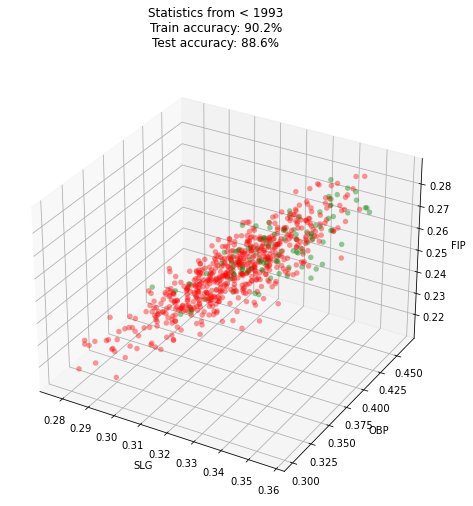

In [12]:
time_period_test(1993, '<')


Weight importance (sorted by closest to 1 i.e. linear correlation):
[('OBP', 1.031), ('ERA', 0.842), ('Ks', 0.596), ('BA', 0.576), ('SLG', 0.313), ('ERA+', 0.311), ('FIP', 0.266), ('HR', 0.257), ('RBIs', 0.254), ('RC', 2.182)]


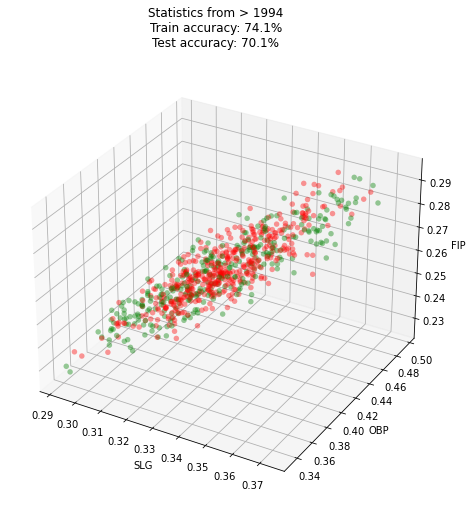

In [13]:
time_period_test(1994, '>')